In [150]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from collections import Counter

# Load Dataset

In [2]:
data = pd.read_excel('card transactions.xlsx')
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [3]:
data.isnull().sum()

Recnum                  0
Cardnum                 0
Date                    0
Merchnum             3375
Merch description       0
Merch state          1195
Merch zip            4656
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [5]:
for col in data.columns:
    print(col,len(data.loc[data[col]=='0'])+len(data.loc[data[col]==0]))

Recnum 0
Cardnum 0
Date 0
Merchnum 231
Merch description 0
Merch state 0
Merch zip 0
Transtype 0
Amount 0
Fraud 95694


In [6]:
data.Fraud.value_counts()

0    95694
1     1059
Name: Fraud, dtype: int64

# Data Cleaning

## Fill missing values

According to data quality checking, three variables -- `merchnum`, `merch.state` and `merch.zip`
are not 100% populated, with missing values and 0s. We assigned values in these fields 
based on other different fields.

- Merchnum: based on merch description (mode)
- Merch state: based on merch zip -> merch description (mode) 
- Merch zip: based on merch num -> merch description (mode)

In [7]:
data.fillna('Unknown',inplace=True)
data.isnull().sum()

Recnum               0
Cardnum              0
Date                 0
Merchnum             0
Merch description    0
Merch state          0
Merch zip            0
Transtype            0
Amount               0
Fraud                0
dtype: int64

### Merchnum

Fill missing merchnum based on Merch description (mode).

In [8]:
missing_merchnum = data.loc[(data.Merchnum=='Unknown')|(data.Merchnum=='0')]
len(missing_merchnum['Merch description'].unique())

930

In [9]:
# before filling
len(missing_merchnum)

3606

In [10]:
def majorityElement(nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        
        if not nums:
            return 'Unknown'
    
        count = {}
        for num in nums:                             # count the number of times every num occurrs
            if num in count:
                count[num] += 1
            else:
                count[num] = 1
        
        return {v: k for k, v in count.items()}[max(count.values())] 

In [11]:
majorityElement(['1','1111','1111','22'])

'1111'

In [12]:
# print to see
# replace with the majority element
for des in missing_merchnum['Merch description'].unique():
    arr = data.loc[(data['Merch description']==des)&(data.Merchnum!='Unknown')&(data.Merchnum!='0')]['Merchnum'].tolist()
    mode = majorityElement(arr)
    print(des,'\t',mode)

CONVENIENCE CHECK FEE(%) 	 Unknown
GRAINGER #973 	 06-3666654612
AUTOMATED OFFICE PRODU 	 06-3666935222
ROLL CALL NEWSPAPER 	 600020014041
MONTGOMERY COLLEGE-PHONE 	 Unknown
ARGENT CHEMICAL LABS 	 900009018624
CHEMUNEX 	 06-3666157897
RETAIL DEBIT ADJUSTMENT 	 Unknown
TEKMAR COMPANY 	 08-0069481648
OPERON TECHNOLOGIES INC 	 991801244335
RETAIL CREDIT ADJUSTMENT 	 Unknown
CHARLESTON CO PARKING OP0 	 Unknown
PACKAGE PLACE  THE 	 Unknown
CUBIX CORPORATION 	 Unknown
SIGNAL GRAPHICS PRINTING 	 Unknown
GRAINGER #932 	 06-3666477676
SUNSET LABORATORY 	 08-0904990330
AUTO PARTS MACHINE SHOP 	 900009097097
THE AMERICAN PHYSIOLOGICA 	 600000642706
C & M OFFICE EQUIPMENT 	 Unknown
HACH COMPANY 	 08-3500900433
MOLECULAR PROBES INC. 	 900009010706
OSU BOOKSTORES INC 	 08-0966777330
LEGASYS INTERNATIONAL INC 	 08-3500601097
TOMMY'S TRAILERS 	 Unknown
CONSOLIDATED FREIGHTWAYS 	 08-9902558331
JF CONTRACTING 	 05-0500900356
Z WORLD/RABBIT SEMICONDUC 	 Unknown
IMPAC/TRI-COUNTY/FREED 	 Unknown
GRAINGER #

IDAHO PUBLIC TV FOUNDTN 	 08-0509624337
WILLIAM L PRATT         0 	 Unknown
SOUTHERN MICRO 	 8000912138
BROOKLYN THERMOMETER 	 08-0069492615
X THE CHEESECAKE 	 Unknown
X HOMEWOOD SUITES 	 Unknown
X FRANKLIN COVEY 	 Unknown
X SNYDERS WILLOW 	 Unknown
WATER RESOURCES PUBLIC 	 Unknown
X UNITED AIR    016 	 Unknown
X DENVER ITL AIRP 	 Unknown
CHMIA                   0 	 Unknown
AMAZON.COM  *SUPERSTOR 	 4353000719908
CARPENTER BROS HDWE DO IT 	 08-3100066227
COUNTRY SURVEY SUPPLY 	 Unknown
FASTSIGNS 	 2722000873087
GRAINGER #423 	 06-3666051986
ALASKA CLEAN SEAS 	 Unknown
BOXWARE INC 	 Unknown
RETAIL DEBIT  ADJUSTMENT 	 Unknown
TSM INC 	 Unknown
POSTMASTER              0 	 Unknown
WIRELESS COMMUNICATION 	 36443735
EDIFRANCE       4227647 	 Unknown
CAPITAL PRESS           0 	 Unknown
A S P R S 	 600020018966
ENVIRONMENTAL RESOURCE 	 06-0060735515
AMER. INDIAN LAW TRAININ0 	 Unknown
GRAINGER #568 	 Unknown
ASSOC OF STATE WETLND MGR 	 Unknown
PLOTTER SUPPLY 	 06-3666709587
THE MISSOULIAN 	 08-

POWER TRANS PRDCT INC 	 Unknown
BOOT HEEL 	 Unknown
MANAGEMENT COMMUNICATION 	 Unknown
WERTZ BROTHERS 	 Unknown
GENOX CORPORATION 	 Unknown
SYSTEMS DESIGN CORP 	 Unknown
B R E LTD 	 Unknown
MENARDS 3109 	 08-3500824264
APPLIED ERGONOMICS INC 	 Unknown
CHROMATOGRAPHY TECHNOLOGY 	 08-0069488248
SATLANTIC INC 	 Unknown
FAMILYGENTIX LTD 	 Unknown
ARGUS PACIFIC           0 	 Unknown
UC REGENTS              0 	 Unknown
NATIONAL OFFICE SYSTEM 	 Unknown
NORTHWEST TROPHY MO TO 	 Unknown
MONTGOMERY SEED 	 Unknown
GRAINGER #597 	 Unknown
THE MAP STORE 	 Unknown
MBS WIRELESS            0 	 Unknown
SOCIETY FOR DERMATOLOGY 	 Unknown
SPOKESMAN REVIEW 	 Unknown
TRIPOD DATA SYSTEMS INC 	 08-0906349339
DALLAS PISTOL CLUB INC  0 	 Unknown
ROSES CONTRACTING AND CON 	 Unknown
SPRI SHOP/PIC LIB 	 Unknown
GOC-NRCC CISTI CNRC 	 Unknown
OCDE PUBLICATIO 4219303 	 Unknown
BELTWAY EXPRESS COMMUNICA 	 Unknown
PROTECH BOOKS 	 4620009463157
TOTAL BUILDING SERVICE 	 Unknown
INST OF TERR ECOLOGY 	 Unknown
BERNEY, INC.

IMPAC/TRI-COUNTY O.P. 	 Unknown
H.H. BARNUM COMPANY 	 Unknown
X EMBASSY SUITES 	 Unknown
FAMILIAN NW            9 	 Unknown
X COMFORT INN-W 	 Unknown
X THE WINDSOR 	 Unknown
X PGH INTL AIRPOR 	 Unknown
THE SOLUTIONS GROUP 	 Unknown
X REVERSAL OF CR BAL REF 	 Unknown
HILL MANUFACTURING CO INC 	 4590640000581
SOWA & NICHOLAS PRINTING 	 Unknown
LASER REGISTRATION INC. 	 Unknown
COSTEO WHOLESALE        0 	 Unknown
US POSTMASTER           0 	 Unknown
THE CAPITAL CONNECTION 	 08-0069498759
AMERICAN METEOROLOGICAL S 	 Unknown
ELECTRON MICROSCOPY SC 	 08-0009499552
THE PIPET PEOPLE 	 Unknown
SMALL BALANCE WRITE-OFF 	 Unknown
EXERCISE EQUIPMNT CTR #8 	 Unknown
RADIO SHACK   00140731 	 4800000640786
DETECT SERVICES 	 Unknown
RADIO SHACK   00186049 	 Unknown
PLANNER PADS CO 	 Unknown
WOOD WISE INTERIORS 	 Unknown
ED HI VAC 800-848-9800 	 490901587222
GELSIM SOFTWARE 	 Unknown
COUNTRY INN ANNAPOLIS 	 08-3500051559
CRC LIMITED 	 Unknown
CC *PC MALL 	 8684000655290
ENVIRONMENTAL SERVICES AS 	 Unknow

In [13]:
%%time
# replace with the majority element
for des in missing_merchnum['Merch description'].unique():
    arr = data.loc[(data['Merch description']==des)&(data.Merchnum!='Unknown')&(data.Merchnum!='0')]['Merchnum'].tolist()
    mode = majorityElement(arr)
    data.loc[(data['Merch description']==des)&(data.Merchnum=='Unknown'),'Merchnum']= mode
    data.loc[(data['Merch description']==des)&(data.Merchnum=='0'),'Merchnum']= mode
    #     print(des,'\t',mode)

CPU times: user 27.4 s, sys: 50.3 ms, total: 27.5 s
Wall time: 27.5 s


In [14]:
# after filling
len(data.loc[(data.Merchnum=='Unknown')|(data.Merchnum=='0')])

2449

### Merch state

Fill missing merch state first 

1) based on `merch zip` (mode), last 

2) based on `merch description` (mode).

Fill missing merch state based on Merch description and Merchnum.

In [15]:
data['Merch state'].value_counts()

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
       ...  
387        1
654        1
924        1
415        1
314        1
Name: Merch state, Length: 228, dtype: int64

In [16]:
# before filling
sum(data['Merch state']=='Unknown')

1195

In [17]:
# print to check
missing_merchstate = data.loc[data['Merch state']=='Unknown']
for zipcode in missing_merchstate['Merch zip'].unique():
    arr = data.loc[(data['Merch zip']==zipcode)&(data['Merch state']!='Unknown')]['Merch state'].tolist()
    mode = majorityElement(arr)
    print(zipcode,'\t',mode)

Unknown 	 VA
926.0 	 Unknown
929.0 	 Unknown
1400.0 	 Unknown
65132.0 	 Unknown
86899.0 	 Unknown
23080.0 	 Unknown
60528.0 	 Unknown
934.0 	 Unknown
902.0 	 Unknown
738.0 	 Unknown
90805.0 	 Unknown
76302.0 	 Unknown
9.0 	 CA
914.0 	 Unknown
6.0 	 VA
95461.0 	 Unknown
50823.0 	 Unknown
2.0 	 MD
48700.0 	 Unknown
680.0 	 Unknown
1.0 	 PA
681.0 	 Unknown
623.0 	 Unknown
726.0 	 Unknown
936.0 	 Unknown
12108.0 	 Unknown
791.0 	 Unknown
907.0 	 Unknown
922.0 	 Unknown
920.0 	 Unknown
3.0 	 GA
801.0 	 Unknown
8.0 	 CO
31040.0 	 Unknown
38117.0 	 TN
41160.0 	 Unknown


In [18]:
%%time
# replace
for zipcode in missing_merchstate['Merch zip'].unique():
    arr = data.loc[(data['Merch zip']==zipcode)
                    &(data['Merch state']!='Unknown')]['Merch state'].tolist()
    mode = majorityElement(arr)
    data.loc[(data['Merch zip']==zipcode)&(data['Merch state']=='Unknown'),'Merch state']= mode

CPU times: user 578 ms, sys: 4.39 ms, total: 582 ms
Wall time: 582 ms


In [19]:
# after filling based on merch state
sum(data['Merch state']=='Unknown')

67

In [20]:
%%time
# replace with description mode
for des in missing_merchstate['Merch description'].unique():
    arr = data.loc[(data['Merch description']==des)&(data['Merch state']!='Unknown')]['Merch state'].tolist()
    mode = majorityElement(arr)
    data.loc[(data['Merch description']==des)&(data['Merch state']=='Unknown'),'Merch state']= mode

CPU times: user 2.53 s, sys: 6.24 ms, total: 2.54 s
Wall time: 2.54 s


In [21]:
# after filling based on merch description
sum(data['Merch state']=='Unknown')

66

### Merch zip

Fill missing merch zip 

1) based on merch num (mode)

2) then based on merch description (mode)

In [22]:
# before filling
sum(data['Merch zip']=='Unknown')

4656

In [23]:
missing_merchzip = data.loc[data['Merch zip']=='Unknown']

In [24]:
%%time
# print to check
for num in missing_merchzip['Merchnum'].unique():
    arr = data.loc[(data['Merchnum']==num)&(data['Merch zip']!='Unknown')]['Merch zip'].tolist()
    mode = majorityElement(arr)
    print(num,'\t',mode)

5000006000095 	 Unknown
8053478940091 	 26003.0
Unknown 	 21045.0
2000049710067 	 Unknown
6700046420068 	 60604.0
6005030600003 	 45750.0
4900000004673 	 60134.0
8849060070074 	 27603.0
1700000096481 	 Unknown
6100020004006 	 20401.0
9900020006406 	 22202.0
6176269 	 Unknown
9900020008506 	 Unknown
5090345469809 	 2852.0
674906173338 	 Unknown
7300020006306 	 64131.0
679960185332 	 Unknown
3000003830064 	 Unknown
6100020006106 	 20402.0
938909498221 	 Unknown
4900000004985 	 Unknown
490908141220 	 Unknown
7284500097374 	 64120.0
900020008906 	 Unknown
6700047350063 	 Unknown
6100020008906 	 20402.0
2094330000009 	 84119.0
36987734 	 Unknown
490908191229 	 Unknown
138900042336 	 Unknown
9900000037306 	 30268.0
3000000000062 	 74004.0
9900000036906 	 22150.0
5847050676706 	 48375.0
4700050550066 	 Unknown
9900000034106 	 19107.0
9900000029606 	 60482.0
3100072100069 	 10007.0
465905123335 	 Unknown
9900000031606 	 95203.0
9900000030406 	 98001.0
9900000024706 	 76115.0
4700020002606 	 60

6023678800627 	 Unknown
3200040720067 	 Unknown
6198070079140 	 55344.0
500020087806 	 Unknown
3900037930063 	 Unknown
6700017150060 	 Unknown
679964780338 	 Unknown
8900000004013 	 98146.0
9608004900903 	 27703.0
8098605560888 	 45342.0
9264000850687 	 20147.0
993960663224 	 Unknown
6064135131 	 Unknown
2200000002891 	 97330.0
6500080605309 	 48084.0
6700057350061 	 Unknown
4700026530060 	 Unknown
497188 	 Unknown
7189060662870 	 66603.0
9600029510069 	 Unknown
80675082 	 Unknown
999966220339 	 Unknown
6105600086977 	 60025.0
4274216553998 	 Unknown
42763/0542763 	 Unknown
1017691368905 	 Unknown
800901922333 	 Unknown
4109024004266 	 Unknown
5740601106819 	 23455.0
4700063260063 	 Unknown
34706/0834706 	 Unknown
9608008000802 	 27511.0
604990447333 	 Unknown
25906793334 	 Unknown
8700000106860 	 Unknown
601909990337 	 Unknown
5800000091301 	 Unknown
4673856331 	 1810.0
3910062600337 	 Unknown
9813403909102 	 Unknown
95581 	 30308.0
30631678 	 Unknown
8100540009697 	 3801.0
7000000073

In [25]:
%%time
# replace based on merchnum
for num in missing_merchzip['Merchnum'].unique():
    arr = data.loc[(data['Merchnum']==num)&(data['Merch zip']!='Unknown')]['Merch zip'].tolist()
    mode = majorityElement(arr)
    data.loc[(data['Merchnum']==num)&(data['Merch zip']=='Unknown'),'Merch zip']= mode

CPU times: user 8.02 s, sys: 16.9 ms, total: 8.04 s
Wall time: 8.04 s


In [26]:
# after filling based on merchnum
sum(data['Merch zip']=='Unknown')

1102

In [27]:
%%time
# replace based on merch description
for des in missing_merchzip['Merch description'].unique():
    arr = data.loc[(data['Merch description']==des)&(data['Merch zip']!='Unknown')]['Merch zip'].tolist()
    mode = majorityElement(arr)
    data.loc[(data['Merch description']==des)&(data['Merch zip']=='Unknown'),'Merch zip']= mode

CPU times: user 14.8 s, sys: 43.6 ms, total: 14.9 s
Wall time: 14.9 s


In [28]:
# after filling based on merch description
sum(data['Merch zip']=='Unknown')

1074

## Fill the left blank with 0

In [29]:
zip_not_null = data.loc[data['Merch zip']!='Unknown']

In [30]:
zip_not_null.loc[zip_not_null['Merch zip']==99999]

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
19799,19800,5142123782,2010-03-17,6173325459,KRUG FURNITURE INC,CA,99999.0,P,939.0,0
31793,31794,5142263776,2010-05-01,6173325459,KRUG FURNITURE INC,CA,99999.0,P,602.0,0
66533,66534,5142143029,2010-08-24,6173325459,KRUG FURNITURE INC,ON,99999.0,P,1258.0,0
79242,79243,5142134426,2010-10-01,6173325459,KRUG FURNITURE INC,CA,99999.0,P,556.0,0


In [31]:
after_fill_left_0 = zip_not_null['Merch zip'].astype('int').apply(lambda x: '{0:0>5}'.format(x))

In [32]:
s = set(after_fill_left_0.index)
len(s)

95679

In [33]:
data['Merch zip'] = [after_fill_left_0[i] if i in after_fill_left_0.index else 'unknown' for i in range(len(data))]
data.head(3)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,01803,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0


## Drop all transtype except those equal to P

In [34]:
data = data.loc[data['Transtype']=='P']
data.Transtype.value_counts()

P    96398
Name: Transtype, dtype: int64

## Remove transaction amout outliers

<AxesSubplot:xlabel='Amount'>

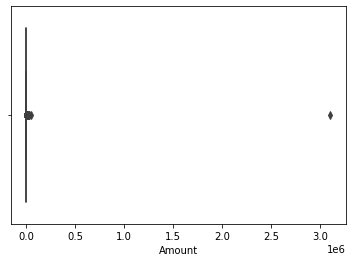

In [35]:
# find the outliers
sns.boxplot(data['Amount'])

<AxesSubplot:xlabel='Amount'>

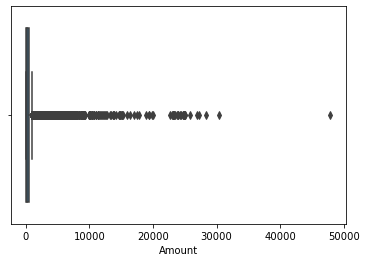

In [36]:
# find the outliers
df_remove_outlier = data.loc[data['Amount']<3000000]
sns.boxplot(df_remove_outlier['Amount'])

In [40]:
# the 1 outliers is not fraud so remove it
data.loc[data['Amount']>3000000]

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
52714,52715,5142189135,2010-07-13,Unknown,INTERMEXICO,VA,21045,P,3102045.53,0


In [41]:
# remove 1 outlier
data = data.loc[data['Amount']<3000000]

In [42]:
data.shape

(96397, 10)

In [43]:
data.to_csv('after cleaning.csv',index=False)

# Feature Creation

In [2]:
data = pd.read_csv('after cleaning.csv',parse_dates=['Date'])
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,01803,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96397 entries, 0 to 96396
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  int64         
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           96397 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        96397 non-null  object        
 6   Merch zip          96397 non-null  object        
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 7.4+ MB


## Create entities

In [4]:
data['Cardnum'] = data['Cardnum'].astype('str')

In [5]:
data['Merch'] = data['Merchnum']+data['Merch description']+data['Merch state']+data['Merch zip']
data['state_zip'] = data['Merch state']+data['Merch zip']
data['card_merch'] = data['Cardnum']+data['Merchnum']
data['card_description'] = data['Cardnum']+data['Merch description']
data['card_state'] = data['Cardnum']+data['Merch state']
data['card_zip'] = data['Cardnum']+data['Merch zip']
data['merch_state'] = data['Merchnum']+data['Merch state']
data['merch_zip'] = data['Merchnum']+data['Merch zip']

In [6]:
data.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud', 'Merch',
       'state_zip', 'card_merch', 'card_description', 'card_state', 'card_zip',
       'merch_state', 'merch_zip'],
      dtype='object')

In [7]:
attributes = ['Cardnum', 'Merchnum', 'Merch description','Merch zip', 'Merch',
       'state_zip', 'card_merch', 'card_description', 'card_state', 'card_zip',
       'merch_state', 'merch_zip']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96397 entries, 0 to 96396
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  object        
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           96397 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        96397 non-null  object        
 6   Merch zip          96397 non-null  object        
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
 10  Merch              96397 non-null  object        
 11  state_zip          96397 non-null  object        
 12  card_merch         96397 non-null  object        
 13  card_description   96397 non-null  object        
 14  card_s

## Create relevant variables

In [9]:
data_copy = data.copy()

In [10]:
aggs = ['avg','max','med','total']
time_period = [0,1,3,7,14,30]

In [11]:
%%time
final = data.copy()
for col in attributes:
    df = data.copy()
    df = df[['Recnum', 'Date', 'Amount', col]]
    temp = pd.merge(df,df, on=col, suffixes=['_l', '_r'])
    temp_t = temp[temp.Date_l >= temp.Date_r]
    for t in time_period:
        # create frequent variables
        temp_1 = temp_t.copy()
        temp_1 = temp_1[temp_1.Date_r >= (temp_1.Date_l - dt.timedelta(t))]
        col_name = f'{col}_count_{t}'
        mapper = temp_1.groupby([col, 'Date_l'])['Recnum_r'].nunique()
        mapper = mapper.reset_index().rename(columns={'Recnum_r': col_name, 'Date_l': 'Date'})
        final = pd.merge(final, mapper, on=[col, 'Date'])
        # create amount variables
        for agg in aggs:
            col_name = f'{agg}_Amount_{col}_{t}'
            if agg == 'avg':
                mapper = temp_1.groupby([col, 'Date_l'])['Amount_r'].mean()
            elif agg == 'max':
                mapper = temp_1.groupby([col, 'Date_l'])['Amount_r'].max()
            elif agg == 'med':
                mapper = temp_1.groupby([col, 'Date_l'])['Amount_r'].median()
            elif agg == 'total':
                mapper = temp_1.groupby([col, 'Date_l'])['Amount_r'].sum()
            mapper = mapper.reset_index().rename(columns={'Amount_r': col_name, 'Date_l': 'Date'})
            final = pd.merge(final, mapper, on=[col, 'Date'])
            new_col_name = f'actual_by_{agg}_Amount_{col}_{t}'
            final[new_col_name] = final['Amount'] / final[col_name]
    print(f'amount for {col} is done.')
    print(f'frequency for {col} is done.')
    
    # create day since variables
    day_since_df = temp[temp.Recnum_l > temp.Recnum_r][['Recnum_l', 'Date_l', 'Date_r']]\
                   .groupby('Recnum_l')[['Date_l', 'Date_r']].last()
    mapper = (day_since_df.Date_l - day_since_df.Date_r).dt.days
    final[col + '_day_since'] = final.Recnum.map(mapper)
    final[col + '_day_since'].fillna(365, inplace = True)
    print(f'day_since for {col} is done.')
    
    # create velocity change variables
    for d in ['0', '1']:
        for dd in ['3', '7', '14', '30']:
            final[col + '_count_' + d + '_by_' + dd]\
                = final[col + '_count_' + d] / (final[col + '_count_' + dd] / float(dd))
            final[col + '_amount_' + d + '_by_' + dd]\
                = final['total' + '_Amount_' + col + '_' + d] / (final['total' + '_Amount_' + col + '_' + dd]/float(dd))
    print(f'velocity change for {col} is done')

amount for Cardnum is done.
frequency for Cardnum is done.
day_since for Cardnum is done.
velocity change for Cardnum is done
amount for Merchnum is done.
frequency for Merchnum is done.
day_since for Merchnum is done.
velocity change for Merchnum is done
amount for Merch description is done.
frequency for Merch description is done.
day_since for Merch description is done.
velocity change for Merch description is done
amount for Merch zip is done.
frequency for Merch zip is done.
day_since for Merch zip is done.
velocity change for Merch zip is done
amount for Merch is done.
frequency for Merch is done.
day_since for Merch is done.
velocity change for Merch is done
amount for state_zip is done.
frequency for state_zip is done.
day_since for state_zip is done.
velocity change for state_zip is done
amount for card_merch is done.
frequency for card_merch is done.
day_since for card_merch is done.
velocity change for card_merch is done
amount for card_description is done.
frequency for car

In [21]:
final_copy = final.copy()
final.to_csv('after 5 feature creation.csv',index=False)

In [23]:
final.sample()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,merch_zip_count_0_by_30,merch_zip_amount_0_by_30,merch_zip_count_1_by_3,merch_zip_amount_1_by_3,merch_zip_count_1_by_7,merch_zip_amount_1_by_7,merch_zip_count_1_by_14,merch_zip_amount_1_by_14,merch_zip_count_1_by_30,merch_zip_amount_1_by_30
17231,17142,5142238608,2010-03-09,9104075140000,STAPLES #756,PA,19115,P,196.7,0,...,5.0,12.606819,3.0,3.0,1.75,3.227235,3.5,6.454471,5.0,12.606819


In [44]:
final_copy.shape

(96397, 871)

In [40]:
data.shape

(96397, 18)

### Risk Tables Variable

In [41]:
final=final_copy

In [49]:
%%time
# split tt and oot (out-of-time data)
final = final.sort_values('Recnum')
final['dow'] = final['Date'].dt.dayofweek
final = final.merge(final[['Recnum','Fraud']], on='Recnum')
train_test = final[final['Date']<'2010-11-01']

CPU times: user 13.9 s, sys: 14 s, total: 27.9 s
Wall time: 29 s


In [54]:
train_test.drop(columns = ['Fraud_y'])
train_test = train_test.rename(columns = {'Fraud_x':'Fraud'})
# do statistical smoothing
c = 4; nmid = 20; y_avg = train_test['Fraud'].mean()
y_dow = train_test.groupby('dow')['Fraud'].mean()
num = train_test.groupby('dow').size()
y_dow_smooth = y_avg + (y_dow-y_avg)/(1+np.exp(-(num-nmid)/c))
final['dow_risk'] = final['dow'].map(y_dow_smooth)

In [56]:
final.drop(columns = ['Fraud_y'],inplace=True)
final = final.rename(columns = {'Fraud_x':'Fraud'})

In [57]:
final

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,merch_zip_count_1_by_3,merch_zip_amount_1_by_3,merch_zip_count_1_by_7,merch_zip_amount_1_by_7,merch_zip_count_1_by_14,merch_zip_amount_1_by_14,merch_zip_count_1_by_30,merch_zip_amount_1_by_30,dow,dow_risk
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,...,3.0,3.000000,7.000000,7.000000,14.000000,14.000000,30.000000,30.000000,4,0.025994
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,01803,P,31.42,0,...,3.0,3.000000,7.000000,7.000000,14.000000,14.000000,30.000000,30.000000,4,0.025994
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0,...,3.0,3.000000,7.000000,7.000000,14.000000,14.000000,30.000000,30.000000,4,0.025994
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0,...,3.0,3.000000,7.000000,7.000000,14.000000,14.000000,30.000000,30.000000,4,0.025994
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,...,3.0,3.000000,7.000000,7.000000,14.000000,14.000000,30.000000,30.000000,4,0.025994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042,P,84.79,0,...,3.0,3.000000,7.000000,7.000000,14.000000,14.000000,30.000000,30.000000,4,0.025994
96393,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248,P,118.75,0,...,3.0,3.000000,7.000000,7.000000,2.800000,1.025981,4.285714,1.299964,4,0.025994
96394,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150,P,363.56,0,...,3.0,3.000000,4.666667,6.281401,8.000000,12.108333,6.000000,8.268009,4,0.025994
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656,P,2202.03,0,...,3.0,3.000000,4.666667,6.649026,4.307692,8.604703,2.608696,5.858854,4,0.025994


### Benford's Law Variable

In [67]:
# remove all transactions from Fedex
remove_fedex = final[~final['Merch description'].str.contains('FEDEX')]

#### By Cardnum

In [253]:
cardnum_dist1 = remove_fedex.groupby('Cardnum').agg({'Amount':list}).reset_index().rename(columns = {'Amount':'Distribution'})
cardnum_dist1

,Cardnum,Distribution
0,5142110002,[150.0]
1,5142110081,"[495.9, 636.2, 636.2, 495.9]"
2,5142110313,"[144.0, 44.0, 100.0]"
3,5142110402,"[506.5, 20.81, 30.26, 437.76, 54.0, 101.5, 30...."
4,5142110434,[1551.64]
...,...,...
1635,5142310397,[357.94]
1636,5142310525,"[318.11, 97.41, 187.69, 563.07]"
1637,5142310598,"[10.81, 103.5]"
1638,5142310768,"[100.0, 92.0, 100.0, 558.0]"


In [177]:
# test
text = '12, 0.1, 12, 33,0.0001, 23, 0.222,0.2,0.0002'
re.findall(r'([12][0-9]*|0.[0]{0,}[12][0-9]*)',text)

['12', '0.1', '12', '0.0001', '23', '0.222', '0.2', '0.0002']

In [254]:
%%time
cnt_low = []
cnt_high = []
for d in cardnum_dist1['Distribution']:
    cnt = Counter()
    for value in d:
        if re.match(r'([12][0-9]*|0.[0]{0,}[12][0-9]*)',str(value)):
            cnt['low']+=1
        if re.match(r'([3-9][0-9]*|0.[0]{0,}[3-9][0-9]*)',str(value)):
            cnt['high']+=1

    cnt_low.append(cnt['low'])
    cnt_high.append(cnt['high'])

CPU times: user 246 ms, sys: 3 ms, total: 249 ms
Wall time: 249 ms


In [255]:
n_mid = 15
c = 3
cardnum_dist1['n_low'] = cnt_low
cardnum_dist1['n_high'] = cnt_high
cardnum_dist1['R'] = np.where((cardnum_dist1['n_high']!=0)&(cardnum_dist1['n_low']!=0), 
                             1.096 * cardnum_dist1['n_low'] / cardnum_dist1['n_high'],
                             1
                            )
cardnum_dist1['1/R'] = 1/cardnum_dist1['R'] 
cardnum_dist1['U'] = np.where(cardnum_dist1['R']>=cardnum_dist1['1/R'],cardnum_dist1['R'],cardnum_dist1['1/R'])
cardnum_dist1['n'] = cardnum_dist1['Distribution'].map(len)
cardnum_dist1['t'] = cardnum_dist1['n'] - n_mid
cardnum_dist1['U*'] = 1+(cardnum_dist1['U']-1)/(1+np.exp(-(cardnum_dist1['n']-n_mid)/c))
cardnum_dist1.sort_values('U*',ascending = False)

,Cardnum,Distribution,n_low,n_high,R,1/R,U,n,t,U*
1177,5142253356,"[27.41, 12.5, 19.95, 420.0, 19.95, 33.86, 20.1...",61,5,13.371200,0.074788,13.371200,66,51,13.371199
1541,5142299705,"[475.0, 1921.0, 1385.0, 2051.25, 2295.0, 2006....",25,3,9.133333,0.109489,9.133333,28,13,9.027976
725,5142197563,"[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....",15,134,0.122687,8.150852,8.150852,149,134,8.150852
697,5142194617,"[22.5, 650.0, 480.0, 650.0, 650.0, 480.0, 650....",5,33,0.166061,6.021898,6.021898,38,23,6.019548
1449,5142288241,"[98.5, 8.36, 79.99, 1617.91, 333.3, 30.3, 30.3...",1,13,0.084308,11.861314,11.861314,14,-1,5.533836
...,...,...,...,...,...,...,...,...,...,...
1478,5142291501,[336.0],0,1,1.000000,1.000000,1.000000,1,-14,1.000000
947,5142225132,[627.75],0,1,1.000000,1.000000,1.000000,1,-14,1.000000
941,5142224649,"[95.59, 95.59]",0,2,1.000000,1.000000,1.000000,2,-13,1.000000
938,5142224315,[112.93],1,0,1.000000,1.000000,1.000000,1,-14,1.000000


In [256]:
# use previous data
cardnum_dist2 = remove_fedex.groupby(['Cardnum','Date']).agg({'Amount':list}).reset_index().rename(columns = {'Amount':'Distribution'})
cardnum_dist2 

,Cardnum,Date,Distribution
0,5142110002,2010-10-12,[150.0]
1,5142110081,2010-03-08,"[495.9, 636.2]"
2,5142110081,2010-11-26,[636.2]
3,5142110081,2010-12-27,[495.9]
4,5142110313,2010-10-07,"[144.0, 44.0, 100.0]"
...,...,...,...
58417,5142847398,2010-03-21,[199.14]
58418,5142847398,2010-03-22,[78.23]
58419,5142847398,2010-03-24,[440.06]
58420,5142847398,2010-03-28,[288.82]


In [250]:
%%time
cardnum_dist2.groupby(['Cardnum','Date'])['Distribution']

CPU times: user 424 µs, sys: 1e+03 ns, total: 425 µs
Wall time: 433 µs


#### By Merchnum

In [251]:
merchnum_dist1 = remove_fedex.groupby('Merchnum').agg({'Amount':list}).reset_index().rename(columns = {'Amount':'Distribution'})
merchnum_dist1

,Merchnum,Distribution
0,003100006NOT6,[59.0]
1,004740006ABC6,[21.75]
2,005590006PNB6,[858.0]
3,014430619 14,[235.06]
4,014938913 51,[310.0]
...,...,...
13078,DU49038320006,[64.0]
13079,JCPENNE9 CO,"[49.99, 20.99, 72.0]"
13080,PENNE9 CO #05,[85.0]
13081,PENNE9 CO #68,[42.38]


In [258]:
%%time
cnt_low = []
cnt_high = []
for d in merchnum_dist1['Distribution']:
    cnt = Counter()
    for value in d:
        if re.match(r'([12][0-9]*|0.[0]{0,}[12][0-9]*)',str(value)):
            cnt['low']+=1
        if re.match(r'([3-9][0-9]*|0.[0]{0,}[3-9][0-9]*)',str(value)):
            cnt['high']+=1

    cnt_low.append(cnt['low'])
    cnt_high.append(cnt['high'])

CPU times: user 256 ms, sys: 3.24 ms, total: 259 ms
Wall time: 258 ms


In [259]:
n_mid = 15
c = 3
merchnum_dist1['n_low'] = cnt_low
merchnum_dist1['n_high'] = cnt_high
merchnum_dist1['R'] = np.where((merchnum_dist1['n_high']!=0)&(merchnum_dist1['n_low']!=0), 
                             1.096 * merchnum_dist1['n_low'] / merchnum_dist1['n_high'],
                             1
                            )
merchnum_dist1['1/R'] = 1/merchnum_dist1['R'] 
merchnum_dist1['U'] = np.where(merchnum_dist1['R']>=merchnum_dist1['1/R'],merchnum_dist1['R'],merchnum_dist1['1/R'])
merchnum_dist1['n'] = merchnum_dist1['Distribution'].map(len)
merchnum_dist1['t'] = merchnum_dist1['n'] - n_mid
merchnum_dist1['U*'] = 1+(merchnum_dist1['U']-1)/(1+np.exp(-(merchnum_dist1['n']-n_mid)/c))
merchnum_dist1.sort_values('U*',ascending = False)

,Merchnum,Distribution,n_low,n_high,R,1/R,U,n,t,U*
9819,8078200641472,"[1.95, 1.95, 1.95, 1.95, 1.95, 1.95, 1.95, 1.9...",59,1,64.664000,0.015465,64.664000,60,45,64.663981
9913,808998385332,"[370.0, 370.0, 370.0, 370.0, 370.0, 370.0, 370...",1,36,0.030444,32.846715,32.846715,37,22,32.825921
4979,55158027,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",27,1,29.592000,0.033793,29.592000,28,13,29.221627
2602,3910694900001,"[295.0, 295.0, 295.0, 295.0, 295.0, 295.0, 295...",25,1,27.400000,0.036496,27.400000,26,11,26.741995
10661,8889817332,"[19.95, 19.95, 19.95, 19.95, 19.95, 19.95, 19....",24,1,26.304000,0.038017,26.304000,25,10,25.432399
...,...,...,...,...,...,...,...,...,...,...
5295,5803300639804,"[490.05, 641.61, 781.14, 815.91]",0,4,1.000000,1.000000,1.000000,4,-11,1.000000
5297,5803301844192,[852.27],0,1,1.000000,1.000000,1.000000,1,-14,1.000000
5298,5803301844883,"[2257.0, 100.0, 2336.0]",3,0,1.000000,1.000000,1.000000,3,-12,1.000000
5300,5803302500373,[79.96],0,1,1.000000,1.000000,1.000000,1,-14,1.000000


#### Combine data

In [264]:
final_2 = final.copy()
final

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,merch_zip_count_1_by_3,merch_zip_amount_1_by_3,merch_zip_count_1_by_7,merch_zip_amount_1_by_7,merch_zip_count_1_by_14,merch_zip_amount_1_by_14,merch_zip_count_1_by_30,merch_zip_amount_1_by_30,dow,dow_risk
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,...,3.0,3.000000,7.000000,7.000000,14.000000,14.000000,30.000000,30.000000,4,0.025994
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,01803,P,31.42,0,...,3.0,3.000000,7.000000,7.000000,14.000000,14.000000,30.000000,30.000000,4,0.025994
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0,...,3.0,3.000000,7.000000,7.000000,14.000000,14.000000,30.000000,30.000000,4,0.025994
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0,...,3.0,3.000000,7.000000,7.000000,14.000000,14.000000,30.000000,30.000000,4,0.025994
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,...,3.0,3.000000,7.000000,7.000000,14.000000,14.000000,30.000000,30.000000,4,0.025994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042,P,84.79,0,...,3.0,3.000000,7.000000,7.000000,14.000000,14.000000,30.000000,30.000000,4,0.025994
96393,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248,P,118.75,0,...,3.0,3.000000,7.000000,7.000000,2.800000,1.025981,4.285714,1.299964,4,0.025994
96394,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150,P,363.56,0,...,3.0,3.000000,4.666667,6.281401,8.000000,12.108333,6.000000,8.268009,4,0.025994
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656,P,2202.03,0,...,3.0,3.000000,4.666667,6.649026,4.307692,8.604703,2.608696,5.858854,4,0.025994


In [267]:
%%time
final = final.merge(merchnum_dist1[['Merchnum','U*']],how = 'left',on='Merchnum')

CPU times: user 13.1 s, sys: 12.8 s, total: 25.9 s
Wall time: 26 s


In [270]:
final.rename(columns = {'U*':'U*_by_merchnum'},inplace=True)

In [273]:
final = final.merge(cardnum_dist1[['Cardnum','U*']],how = 'left',on='Cardnum').\
        rename(columns = {'U*':'U*_by_cardnum'})
final.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,merch_zip_count_1_by_7,merch_zip_amount_1_by_7,merch_zip_count_1_by_14,merch_zip_amount_1_by_14,merch_zip_count_1_by_30,merch_zip_amount_1_by_30,dow,dow_risk,U*_by_merchnum,U*_by_cardnum
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,...,7.0,7.0,14.0,14.0,30.0,30.0,4,0.025994,NaN,2.178008
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,01803,P,31.42,0,...,7.0,7.0,14.0,14.0,30.0,30.0,4,0.025994,1.000000,1.604857
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0,...,7.0,7.0,14.0,14.0,30.0,30.0,4,0.025994,1.025818,2.368143
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0,...,7.0,7.0,14.0,14.0,30.0,30.0,4,0.025994,NaN,1.044105
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,...,7.0,7.0,14.0,14.0,30.0,30.0,4,0.025994,NaN,2.178008


In [283]:
%%time
# fill na in U* with the default value——the bad rate for the entire population.
cnt_low = []
cnt_high = []
for d in final['Amount']:
    cnt = Counter()
    if re.match(r'([12][0-9]*|0.[0]{0,}[12][0-9]*)',str(d)):
        cnt['low']+=1
    if re.match(r'([3-9][0-9]*|0.[0]{0,}[3-9][0-9]*)',str(d)):
        cnt['high']+=1

    cnt_low.append(cnt['low'])
    cnt_high.append(cnt['high'])

CPU times: user 402 ms, sys: 5.58 ms, total: 408 ms
Wall time: 407 ms


In [288]:
n_mid = 15
c = 3
n = len(final)
R = 1.096*sum(cnt_low)/sum(cnt_high)
U = max(R,1/R)
U_all = 1+(U-1)/(1+np.exp(-(n-n_mid)/c))
U_all

1.1434914571701709

In [290]:
final['U*_by_merchnum'].fillna(U_all,inplace=True)
final['U*_by_cardnum'].fillna(U_all,inplace=True)
final.isnull().sum()

Recnum                      0
Cardnum                     0
Date                        0
Merchnum                    0
Merch description           0
                           ..
merch_zip_amount_1_by_30    0
dow                         0
dow_risk                    0
U*_by_merchnum              0
U*_by_cardnum               0
Length: 874, dtype: int64

In [291]:
%%time
final.to_csv('after_feature_creation.csv',index=False)

CPU times: user 54.4 s, sys: 657 ms, total: 55.1 s
Wall time: 55.2 s
